## Business objective : Prediction of Loan Status

In [1]:
## Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, f1_score


In [2]:
# Import ML model Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


##### Importing datasets

In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [4]:
train_data.shape, test_data.shape   

((614, 13), (367, 12))

In [5]:
train_data.info(), test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Co

(None, None)

In [6]:
## Concatinating train and test data since we need to analyze complete data

data = pd.concat([train_data, test_data], sort = False)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [7]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [8]:
## Finding the sum of null values in complete data

print(data.isnull().sum().sort_values(ascending = False))  

Loan_Status          367
Credit_History        79
Self_Employed         55
LoanAmount            27
Dependents            25
Gender                24
Loan_Amount_Term      20
Married                3
Property_Area          0
CoapplicantIncome      0
ApplicantIncome        0
Education              0
Loan_ID                0
dtype: int64


In [10]:
data.duplicated().sum()  ## No duplicates in complete data

0

In [13]:
c = data.corr()
c

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.114247,0.551811,-0.023089,0.023378
CoapplicantIncome,-0.114247,1.000000,0.179228,-0.043860,-0.027253
LoanAmount,0.551811,0.179228,1.000000,0.055636,-0.008235
Loan_Amount_Term,-0.023089,-0.043860,0.055636,1.000000,-0.020439
Credit_History,0.023378,-0.027253,-0.008235,-0.020439,1.000000


<AxesSubplot:>

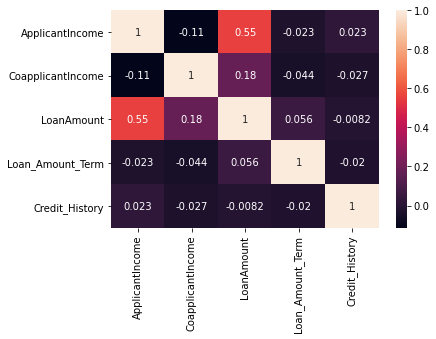

In [13]:
sns.heatmap(c, annot = True)

#### Handling Missing data
Applying Mode Imputation on Categorical data

Applying mean and median imputation on numerical data depending on outliers present in that variable

In [14]:
data['Gender']=data.Gender.fillna(data['Gender'].mode()[0])
data['Married'] =  data.Married.fillna(data.Married.mode()[0])
data['Dependents'] =  data.Dependents.fillna(data.Dependents.mode()[0])
data['Self_Employed'] =  data.Self_Employed.fillna(data.Self_Employed.mode()[0])

data.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

### Visualizations of Categorical data

Univariate Analysis



Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64
Male      0.814475
Female    0.185525
Name: Gender, dtype: float64
Yes    0.646279
No     0.353721
Name: Married, dtype: float64
0     0.581040
1     0.163099
2     0.163099
3+    0.092762
Name: Dependents, dtype: float64
Graduate        0.777778
Not Graduate    0.222222
Name: Education, dtype: float64
No     0.878695
Yes    0.121305
Name: Self_Employed, dtype: float64
Semiurban    0.355759
Urban        0.348624
Rural        0.295617
Name: Property_Area, dtype: float64
1.0    0.83592
0.0    0.16408
Name: Credit_History, dtype: float64


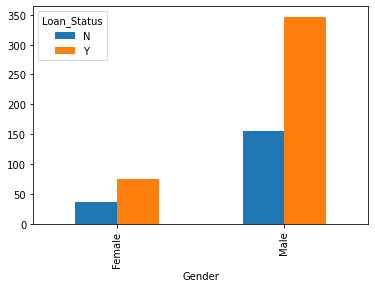

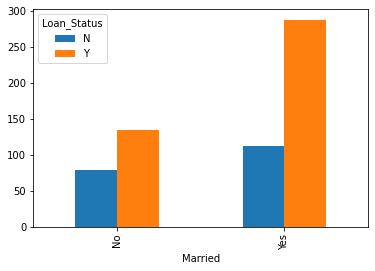

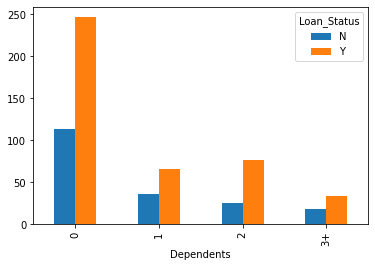

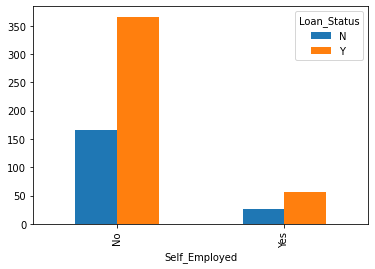

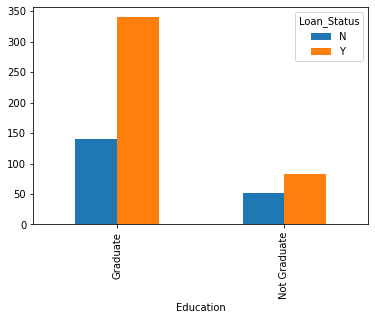

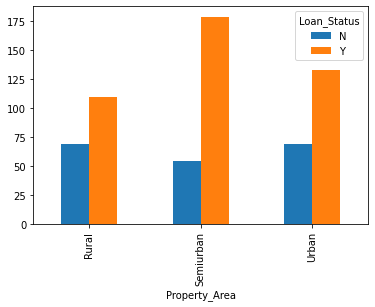

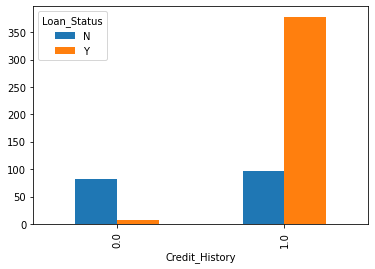

In [14]:
import warnings
warnings.filterwarnings('ignore')

pd.crosstab(data['Gender'], data['Loan_Status']).plot(kind='bar')
pd.crosstab(data['Married'], data['Loan_Status']).plot(kind='bar')
pd.crosstab(data['Dependents'], data['Loan_Status']).plot(kind='bar')
pd.crosstab(data['Self_Employed'], data['Loan_Status']).plot(kind='bar')
pd.crosstab(data['Education'], data['Loan_Status']).plot(kind='bar')
pd.crosstab(data['Property_Area'], data['Loan_Status']).plot(kind='bar')
pd.crosstab(data['Credit_History'], data['Loan_Status']).plot(kind='bar')

print(data['Loan_Status'].value_counts(normalize= True))
print(data['Gender'].value_counts(normalize = True)) 
print(data['Married'].value_counts(normalize = True)) 
print(data['Dependents'].value_counts(normalize = True)) 
print(data['Education'].value_counts(normalize = True)) 
print(data['Self_Employed'].value_counts(normalize = True)) 
print(data['Property_Area'].value_counts(normalize = True)) 
print(data['Credit_History'].value_counts(normalize = True)) 


In [15]:
bank_data = data.copy()
bank_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [16]:
### Converting categorical data into numerical data


bank_data.Gender = bank_data.Gender.map({'Male':1,'Female':0})
bank_data.Married = bank_data.Married.map({'Yes':1,'No':0})
bank_data.Education = bank_data.Education.map({'Graduate':1,'Not Graduate':0})
bank_data.Self_Employed = bank_data.Self_Employed.map({'Yes':1,'No':0})
bank_data.Property_Area = bank_data.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})
print(bank_data['Property_Area'].value_counts())
print(bank_data['Self_Employed'].value_counts())
print(bank_data['Education'].value_counts())
print(bank_data['Married'].value_counts())
print(bank_data['Gender'].value_counts())
print(bank_data['Dependents'].value_counts())


1    349
2    342
0    290
Name: Property_Area, dtype: int64
0    862
1    119
Name: Self_Employed, dtype: int64
1    763
0    218
Name: Education, dtype: int64
1    634
0    347
Name: Married, dtype: int64
1    799
0    182
Name: Gender, dtype: int64
0     570
2     160
1     160
3+     91
Name: Dependents, dtype: int64


In [17]:
bank_data['Loan_Status']= bank_data['Loan_Status'].map({'Y':1, 'N': 0})
bank_data['Dependents']= bank_data['Dependents'].map({'0':0, '1':1,'2':2, '3+': 3})


In [18]:
bank_data.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status          float64
dtype: object

### Handling Numerical data and its Visualization

In [21]:
num_data = train_data.iloc[:,[6,7,8,9,10]]
num_data.head(3)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0


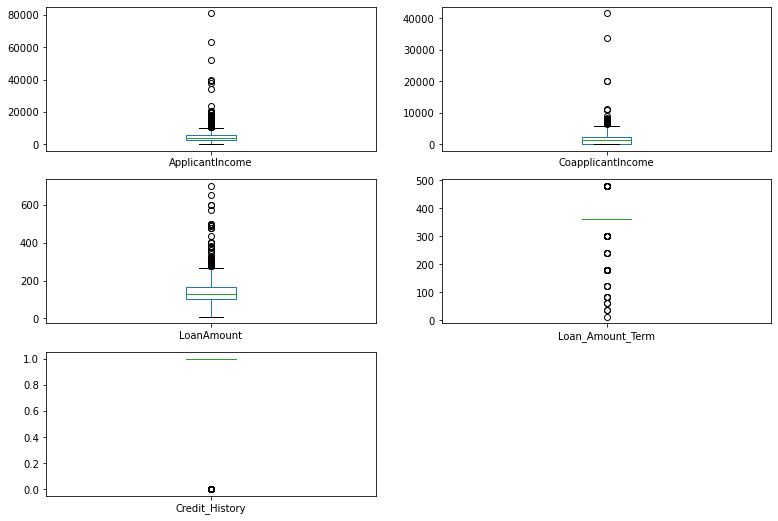

In [22]:
### Univariate analysis

num_data.plot(kind='box', subplots=True, layout=(3,2), sharex=False, sharey=False,figsize = (13,9))
plt.show()


array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>],
       [<AxesSubplot:title={'center':'Credit_History'}>, <AxesSubplot:>]],
      dtype=object)

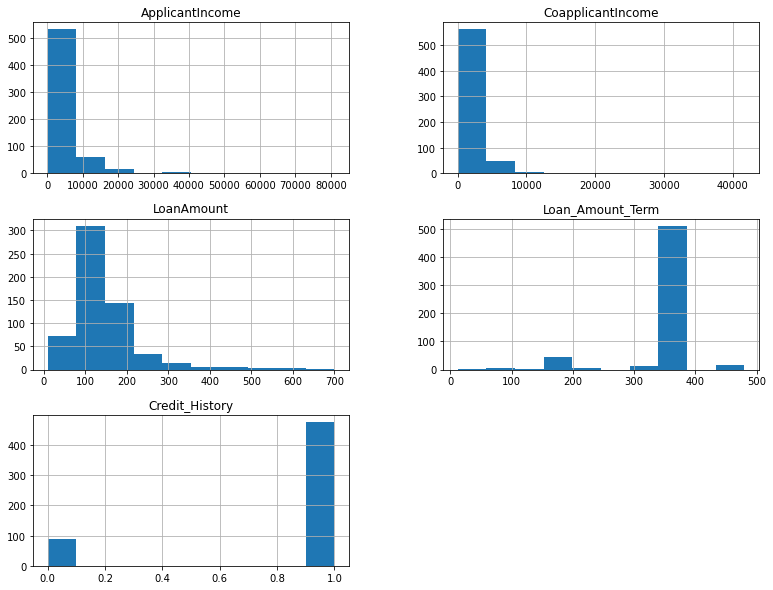

In [23]:
num_data.hist(figsize=(13,10))

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

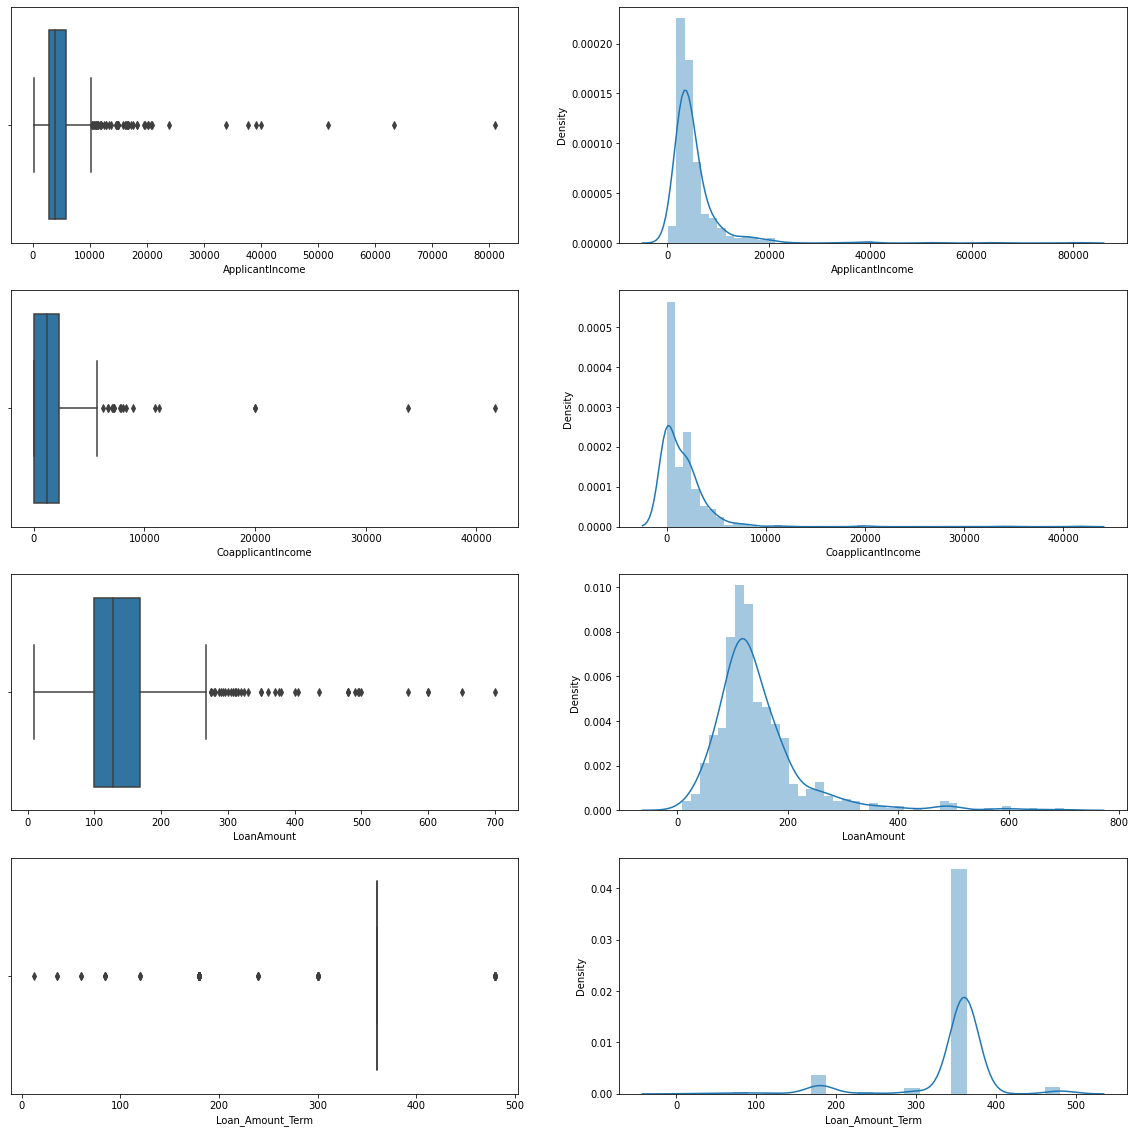

In [25]:
import warnings
warnings.filterwarnings('ignore')

fig,ax = plt.subplots(figsize=(20,20),nrows=4,ncols=2)
sns.boxplot(num_data['ApplicantIncome'],  ax=ax[0][0])
sns.distplot(num_data['ApplicantIncome'], kde = True, ax=ax[0][1])
sns.boxplot(num_data['CoapplicantIncome'],  ax=ax[1][0])
sns.distplot(num_data['CoapplicantIncome'], kde = True, ax=ax[1][1])
sns.boxplot(num_data['LoanAmount'], ax=ax[2][0])
sns.distplot(num_data['LoanAmount'], kde = True, ax=ax[2][1])
sns.boxplot(num_data['Loan_Amount_Term'],  ax=ax[3][0])
sns.distplot(num_data['Loan_Amount_Term'], kde = True, ax=ax[3][1])




In [27]:
num_data.isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
dtype: int64

In [28]:
num_data.mean()

ApplicantIncome      5403.459283
CoapplicantIncome    1621.245798
LoanAmount            146.412162
Loan_Amount_Term      342.000000
Credit_History          0.842199
dtype: float64

## Imputation 
LoanAmount with its mean

Loan_amount_term with 360 months

credit_history with its mode


In [30]:
bank_data['LoanAmount'] = bank_data['LoanAmount'].fillna(bank_data.LoanAmount.mean())
bank_data['Loan_Amount_Term'] = bank_data['Loan_Amount_Term'].fillna(360)
bank_data['Credit_History'] = bank_data['Credit_History'].fillna(1)
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             981 non-null    int64  
 2   Married            981 non-null    int64  
 3   Dependents         981 non-null    int64  
 4   Education          981 non-null    int64  
 5   Self_Employed      981 non-null    int64  
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         981 non-null    float64
 9   Loan_Amount_Term   981 non-null    float64
 10  Credit_History     981 non-null    float64
 11  Property_Area      981 non-null    int64  
 12  Loan_Status        614 non-null    float64
dtypes: float64(5), int64(7), object(1)
memory usage: 107.3+ KB


### Treating Outliers

In [31]:
bank_data = bank_data.drop(['Loan_ID'], axis = 1)

In [32]:
bank_data.isnull().sum()

Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

In [33]:
corr = bank_data.corr()
corr

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.327012,0.139248,-0.040649,0.024719,0.060444,0.082428,0.096499,-0.069058,0.018627,-0.020801,0.017987
Married,0.327012,1.000000,0.344291,-0.026211,0.013666,0.052126,0.061606,0.156737,-0.047505,0.021738,0.006372,0.091478
Dependents,0.139248,0.344291,1.000000,-0.084894,0.026241,0.122136,0.003223,0.149233,-0.084190,-0.045335,0.018639,0.010118
Education,-0.040649,-0.026211,-0.084894,1.000000,0.010848,0.138909,0.060380,0.162215,0.021575,0.062416,0.050685,0.085884
Self_Employed,0.024719,0.013666,0.026241,0.010848,1.000000,0.113106,-0.018861,0.106942,-0.031451,0.034485,-0.059678,-0.003700
ApplicantIncome,0.060444,0.052126,0.122136,0.138909,0.113106,1.000000,-0.114247,0.547188,-0.023823,0.020201,0.005513,-0.004710
CoapplicantIncome,0.082428,0.061606,0.003223,0.060380,-0.018861,-0.114247,1.000000,0.178449,-0.042750,-0.011531,-0.024921,-0.059187
LoanAmount,0.096499,0.156737,0.149233,0.162215,0.106942,0.547188,0.178449,1.000000,0.053187,-0.003577,-0.035653,-0.035742
Loan_Amount_Term,-0.069058,-0.047505,-0.084190,0.021575,-0.031451,-0.023823,-0.042750,0.053187,1.000000,-0.021495,-0.041144,-0.022549
Credit_History,0.018627,0.021738,-0.045335,0.062416,0.034485,0.020201,-0.011531,-0.003577,-0.021495,1.000000,0.024342,0.540556


<AxesSubplot:>

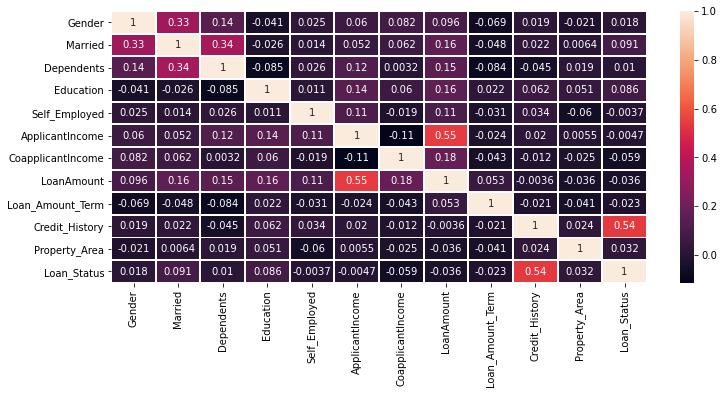

In [34]:
plt.figure(figsize= (12,5))
sns.heatmap(corr, annot = True, linewidth = 1, cbar=True)

###### Standardizing the data

In [35]:
def standfn (x):
    return (x-x.mean())/x.std()

In [36]:
scaled = standfn(bank_data)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

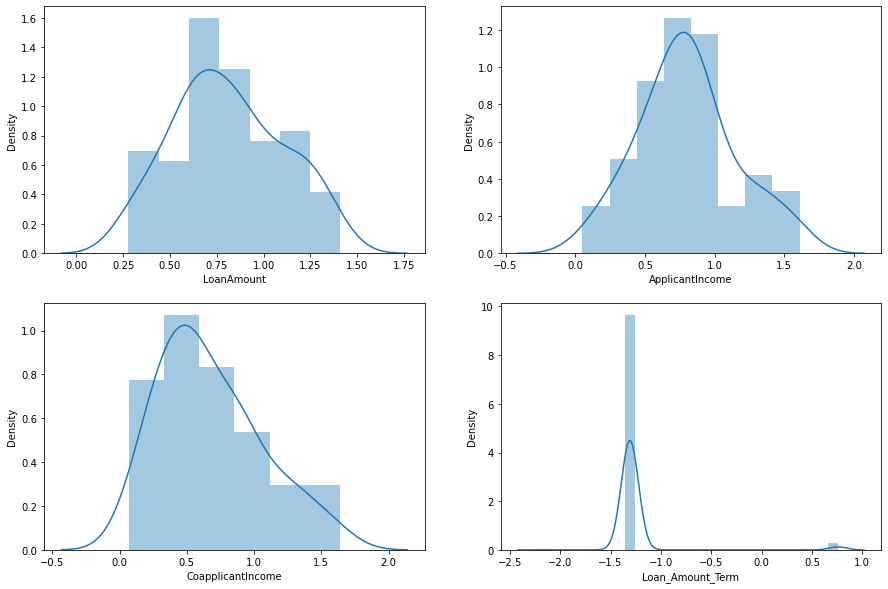

In [37]:
import warnings
warnings.filterwarnings('ignore')

fig,ax = plt.subplots(figsize=(15,10),nrows=2,ncols=2)
sns.distplot(np.power(np.log(scaled[ 'LoanAmount']),1/2), ax= ax[0][0])
sns.distplot(np.power(np.log(scaled['ApplicantIncome']),1/2),  ax= ax[0][1])
sns.distplot(np.power(np.log(scaled['CoapplicantIncome']),1/2), ax= ax[1][0])
sns.distplot(np.log(scaled['Loan_Amount_Term']), ax= ax[1][1])

<AxesSubplot:xlabel='Loan_Amount_Term'>

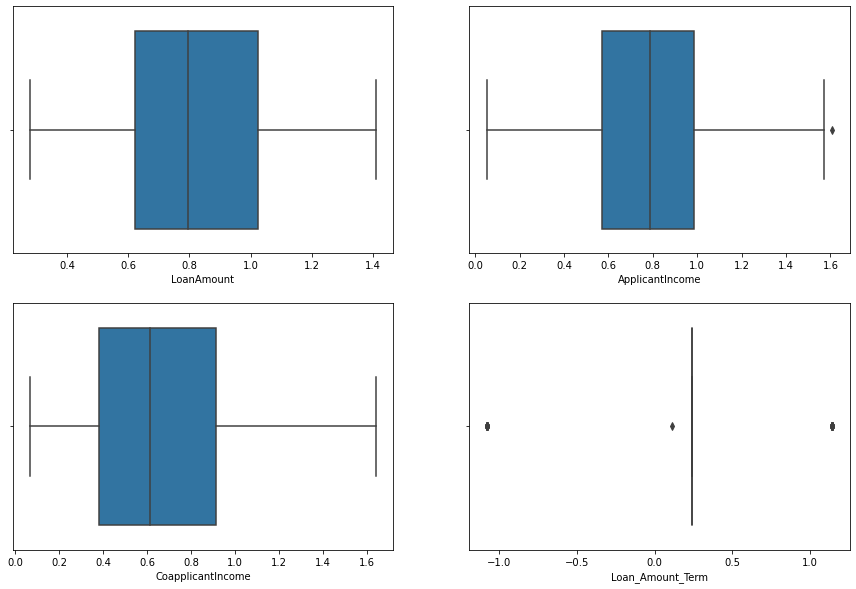

In [60]:

fig,ax = plt.subplots(figsize=(15,10),nrows=2,ncols=2)
sns.boxplot(np.power(np.log(scaled[ 'LoanAmount']),1/2), ax= ax[0][0])
sns.boxplot(np.power(np.log(scaled['ApplicantIncome']),1/2) , ax= ax[0][1])
sns.boxplot(np.power(np.log(scaled['CoapplicantIncome']),1/2), ax= ax[1][0])
sns.boxplot(np.log1p(scaled['Loan_Amount_Term']), ax= ax[1][1])

### Only the credit history is having significant relation with the LoanStatus 
No other variables are having much influence on the loan status
So we need to create new features which show influence on loanstatus using available features

In [38]:
### Feature Engineering

scaled['loan_amount_install'] = scaled['LoanAmount'] * 1000 / bank_data['Loan_Amount_Term']

scaled['TotalIncome'] = scaled['ApplicantIncome'] + bank_data['CoapplicantIncome']

In [39]:
scaled.isnull().sum()

Gender                   0
Married                  0
Dependents               0
Education                0
Self_Employed            0
ApplicantIncome          0
CoapplicantIncome        0
LoanAmount               0
Loan_Amount_Term         0
Credit_History           0
Property_Area            0
Loan_Status            367
loan_amount_install      0
TotalIncome              0
dtype: int64

In [42]:
scaled['Loanamt_log'] = np.log1p(scaled.LoanAmount)
scaled['Loanamt_install_log'] =  np.log(scaled.loan_amount_install)
scaled['totalincome_log'] = np.log1p(scaled.TotalIncome)

In [43]:
scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               981 non-null    float64
 1   Married              981 non-null    float64
 2   Dependents           981 non-null    float64
 3   Education            981 non-null    float64
 4   Self_Employed        981 non-null    float64
 5   ApplicantIncome      981 non-null    float64
 6   CoapplicantIncome    981 non-null    float64
 7   LoanAmount           981 non-null    float64
 8   Loan_Amount_Term     981 non-null    float64
 9   Credit_History       981 non-null    float64
 10  Property_Area        981 non-null    float64
 11  Loan_Status          614 non-null    float64
 12  loan_amount_install  981 non-null    float64
 13  TotalIncome          981 non-null    float64
 14  Loanamt_log          912 non-null    float64
 15  Loanamt_install_log  378 non-null    flo

In [44]:
scaled.drop(scaled.iloc[:,[5,6,7,13,12]], axis = 1, inplace = True)

In [45]:
scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               981 non-null    float64
 1   Married              981 non-null    float64
 2   Dependents           981 non-null    float64
 3   Education            981 non-null    float64
 4   Self_Employed        981 non-null    float64
 5   Loan_Amount_Term     981 non-null    float64
 6   Credit_History       981 non-null    float64
 7   Property_Area        981 non-null    float64
 8   Loan_Status          614 non-null    float64
 9   Loanamt_log          912 non-null    float64
 10  Loanamt_install_log  378 non-null    float64
 11  totalincome_log      981 non-null    float64
dtypes: float64(12)
memory usage: 99.6 KB


In [46]:
scaled['Loanamt_log'] = scaled['Loanamt_log'].sample(981).reset_index()
scaled['Loanamt_install_log'] = scaled['Loanamt_install_log'].sample(981).reset_index()


In [47]:
scaled.isnull().sum()

Gender                   0
Married                  0
Dependents               0
Education                0
Self_Employed            0
Loan_Amount_Term         0
Credit_History           0
Property_Area            0
Loan_Status            367
Loanamt_log              0
Loanamt_install_log      0
totalincome_log          0
dtype: int64

<AxesSubplot:xlabel='Loan_Amount_Term'>

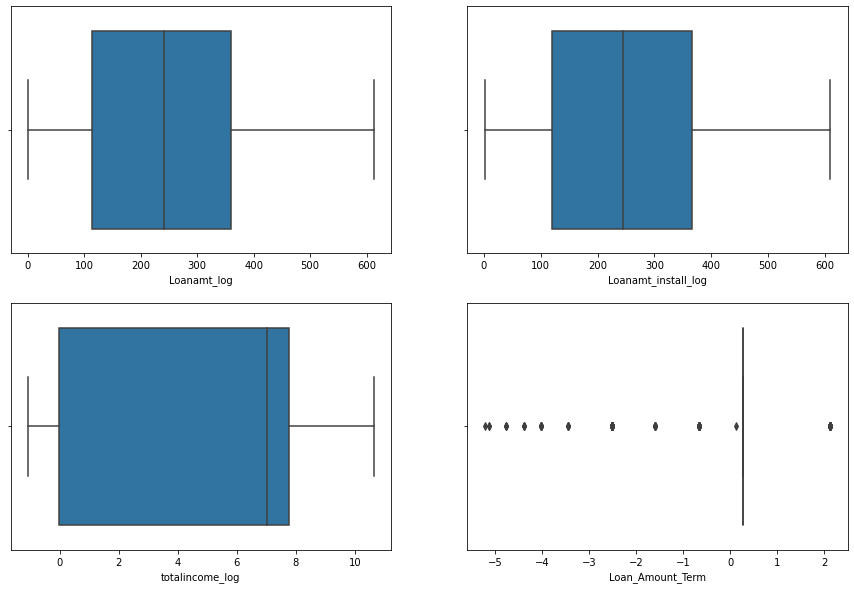

In [48]:
import warnings
warnings.filterwarnings('ignore')


fig,ax = plt.subplots(figsize=(15,10),nrows=2,ncols=2)
sns.boxplot((scaled[ 'Loanamt_log']), ax= ax[0][0])
sns.boxplot((scaled['Loanamt_install_log']) , ax= ax[0][1])
sns.boxplot((scaled['totalincome_log']), ax= ax[1][0])
sns.boxplot((scaled['Loan_Amount_Term']), ax= ax[1][1])

In [49]:
train = scaled.iloc[:614,:]
test = scaled.iloc[614:,:]
train.shape, test.shape

((614, 12), (367, 12))

In [50]:
test = test.drop(['Loan_Status'], axis =1)

In [51]:
train.info(),   test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               614 non-null    float64
 1   Married              614 non-null    float64
 2   Dependents           614 non-null    float64
 3   Education            614 non-null    float64
 4   Self_Employed        614 non-null    float64
 5   Loan_Amount_Term     614 non-null    float64
 6   Credit_History       614 non-null    float64
 7   Property_Area        614 non-null    float64
 8   Loan_Status          614 non-null    float64
 9   Loanamt_log          614 non-null    float64
 10  Loanamt_install_log  614 non-null    float64
 11  totalincome_log      614 non-null    float64
dtypes: float64(12)
memory usage: 62.4 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 

(None, None)

In [52]:
x = train.drop(['Loan_Status'], axis = 1)
y = train_data.Loan_Status
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [53]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               614 non-null    float64
 1   Married              614 non-null    float64
 2   Dependents           614 non-null    float64
 3   Education            614 non-null    float64
 4   Self_Employed        614 non-null    float64
 5   Loan_Amount_Term     614 non-null    float64
 6   Credit_History       614 non-null    float64
 7   Property_Area        614 non-null    float64
 8   Loanamt_log          614 non-null    float64
 9   Loanamt_install_log  614 non-null    float64
 10  totalincome_log      614 non-null    float64
dtypes: float64(11)
memory usage: 57.6 KB


In [54]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y = pd.DataFrame(y)

In [55]:
## Spliting the data using Train & test splits

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.33, random_state = 100, stratify = y)

In [56]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((411, 11), (203, 11), (411, 1), (203, 1))

In [57]:
### Applying SMOTE technique to balance the data 
## pip install imblearn
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy = 'minority')
x_sm , y_sm = smote.fit_resample(x,y)



In [58]:
y.value_counts(),  y_sm.value_counts()

(1    422
 0    192
 dtype: int64,
 1    422
 0    422
 dtype: int64)

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size = 0.33, random_state= 40)

In [60]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((565, 11), (565, 1), (279, 11), (279, 1))

In [61]:
ytest.value_counts()

1    140
0     63
dtype: int64

In [62]:
y_test = pd.DataFrame({'Loan_status': y_test.iloc[:,0]})

##### We are building multiple models using different ML algorithms
1. KNN method
2. Decision Tree method
3. Logistic Regression 
4. Ensemble Techniques
5. XGBM and LGBM
6. SVM
7. Neural Networks

## K-Nearest Neighbors Method

In [75]:
### KNN Technique
model = KNeighborsClassifier()
model.fit(x_sm, y_sm)
y_predict = model.predict(x_test)  ## pediction for old data
y_predict_new = model.predict(test)  ## prediction for new data
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))  ## report for old data
print(classification_report(y_test,  pd.DataFrame(y_predict_new).sample(279)))  ## report for new data

0.8207885304659498
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       138
           1       0.86      0.77      0.81       141

    accuracy                           0.82       279
   macro avg       0.82      0.82      0.82       279
weighted avg       0.83      0.82      0.82       279

              precision    recall  f1-score   support

           0       0.45      0.37      0.41       138
           1       0.48      0.56      0.51       141

    accuracy                           0.47       279
   macro avg       0.46      0.46      0.46       279
weighted avg       0.46      0.47      0.46       279



#### Applying GridSearchCV to tune the parameters

In [82]:
model_params = KNeighborsClassifier()
params = [{'n_neighbors':range(2,30), 'weights': ['uniform','distance'],
          'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'], 'leaf_size': [2,5,10,15],
          'p':[1,2]}]
grid_search = GridSearchCV(model_params, params,)
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid=[{'algorithm': ['auto', 'ball_tree', 'kd_tree',
                                        'brute'],
                          'leaf_size': [2, 5, 10, 15],
                          'n_neighbors': range(2, 30), 'p': [1, 2],
                          'weights': ['uniform', 'distance']}])

In [83]:
grid_search.best_params_

{'algorithm': 'auto',
 'leaf_size': 2,
 'n_neighbors': 2,
 'p': 1,
 'weights': 'distance'}

In [84]:
### Building KNN model with best parameters

model_best = KNeighborsClassifier(leaf_size= 2, n_neighbors= 4, p= 1, weights= 'distance')
model_best.fit(xtrain, ytrain)
y_pre = model_best.predict(x_train)
y_pre_new = model_best.predict(x_test)
print(classification_report(y_train, y_pre))
print(classification_report(y_test, y_pre_new))

              precision    recall  f1-score   support

           0       0.90      0.64      0.75       284
           1       0.72      0.93      0.81       281

    accuracy                           0.78       565
   macro avg       0.81      0.78      0.78       565
weighted avg       0.81      0.78      0.78       565

              precision    recall  f1-score   support

           0       0.91      0.72      0.80       138
           1       0.77      0.93      0.84       141

    accuracy                           0.82       279
   macro avg       0.84      0.82      0.82       279
weighted avg       0.84      0.82      0.82       279



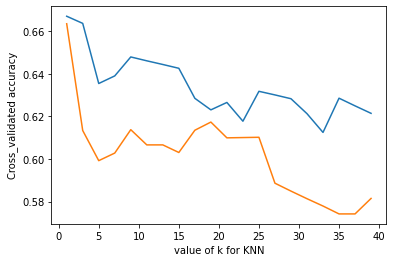

In [88]:
k_range = range(1,40,2)
k_trainscores = []
k_testscores =[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k, leaf_size= 2, p= 1, weights= 'distance')
    scores_train = cross_val_score(knn, x_train, y_train, cv=10)
    scores_test = cross_val_score(knn, x_test, y_test, cv = 10)
    k_trainscores.append(scores_train.mean())
    k_testscores.append(scores_test.mean())
plt.plot(k_range, k_trainscores)
plt.plot(k_range, k_testscores)
plt.xlabel('value of k for KNN')
plt.ylabel('Cross_validated accuracy')
plt.show()

In [158]:
model_KNN = KNeighborsClassifier(leaf_size = 2, n_neighbors = 15, p= 1, weights= 'distance')
model_KNN.fit(x_train, y_train)

y_pre = model_KNN.predict(x_train)
score_train = cross_val_score(model_KNN, y_train , y_pre)
    
y_pre_new = model_KNN.predict(x_test)
score_test = cross_val_score(model_KNN, y_test , y_pre_new)

print(classification_report(y_train, y_pre))
print(classification_report(y_test, y_pre_new))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       284
           1       1.00      1.00      1.00       281

    accuracy                           1.00       565
   macro avg       1.00      1.00      1.00       565
weighted avg       1.00      1.00      1.00       565

              precision    recall  f1-score   support

           0       0.67      0.82      0.74       138
           1       0.77      0.60      0.68       141

    accuracy                           0.71       279
   macro avg       0.72      0.71      0.71       279
weighted avg       0.72      0.71      0.71       279



In [159]:
scores_train.mean(), scores_test.mean()

(0.6214285714285714, 0.5814814814814814)

In [165]:
score_knn1 = roc_auc_score(y_train, y_pre)     
score_knn2  =  roc_auc_score(y_test, y_pre_new)
print(score_knn1, '\n', score_knn2)

1.0 
 0.7108387295713845


In [166]:
confusion_matrix(y_train, y_pre),   confusion_matrix(y_test, y_pre_new)

(array([[284,   0],
        [  0, 281]], dtype=int64),
 array([[113,  25],
        [ 56,  85]], dtype=int64))

### Decision Tree Classifier

In [150]:
##  Decision Tree with training data

tree = DecisionTreeClassifier()
clf = tree.fit(x_train,y_train)
y_pred = clf.predict(x_train)
print(classification_report(y_train, y_pred))
print("Validation Mean F1 Score: ",cross_val_score(clf,x_train,y_train,cv=10,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(clf,x_train,y_train,cv=10,scoring='accuracy').mean())

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       284
           1       1.00      1.00      1.00       281

    accuracy                           1.00       565
   macro avg       1.00      1.00      1.00       565
weighted avg       1.00      1.00      1.00       565

Validation Mean F1 Score:  0.7583427219700426
Validation Mean Accuracy:  0.7450501253132832


In [151]:
pd.crosstab(y_train.iloc[:,0], y_pred)

col_0,0,1
Loan_Status,,
0,284,0
1,0,281


In [152]:
## Finding best parameters using GridSearchCV 

clf = DecisionTreeClassifier(random_state=0)
params={'class_weight':['balanced'], 
        'max_features' : [3,5,7,9,11,'auto'],
        'max_depth' : [4,6,7,8,9,10],
        'criterion' :['gini','entropy'],
        'min_samples_split' : [2,5,10,20,30],
       'max_leaf_nodes': [2,3,4]}

grid_search = GridSearchCV(estimator = clf, param_grid = params, cv = 10, scoring = 'f1', return_train_score=True,)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 7, 8, 9, 10],
                         'max_features': [3, 5, 7, 9, 11, 'auto'],
                         'max_leaf_nodes': [2, 3, 4],
                         'min_samples_split': [2, 5, 10, 20, 30]},
             return_train_score=True, scoring='f1')

In [153]:
grid_search.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 9,
 'max_leaf_nodes': 4,
 'min_samples_split': 2}

In [98]:
## Building Decision Tree with Best Parameters

model_clf= DecisionTreeClassifier(class_weight = 'balanced', max_depth = 4,max_features = 9,
 max_leaf_nodes = 4,min_samples_split =  2)
clf = model_clf.fit(x_train,y_train)
y_pred_best = clf.predict(x_train)
y_pred_test = clf.predict(x_test)

print(classification_report(y_train, y_pred_best))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.98      0.61      0.75       284
           1       0.71      0.99      0.83       281

    accuracy                           0.80       565
   macro avg       0.85      0.80      0.79       565
weighted avg       0.85      0.80      0.79       565

              precision    recall  f1-score   support

           0       0.95      0.56      0.70       138
           1       0.69      0.97      0.81       141

    accuracy                           0.77       279
   macro avg       0.82      0.76      0.76       279
weighted avg       0.82      0.77      0.76       279



In [167]:
score_clf1 = roc_auc_score(y_train, y_pred_best)
score_clf2 = roc_auc_score(y_test, y_pred_test)
score_clf1, score_clf2

(0.7974600270663124, 0.7648011100832562)

In [100]:
print('Accuracy : ',accuracy_score(y_train, y_pred_best))
pd.crosstab(y_train.iloc[:,0], y_pred_best)

Accuracy :  0.7964601769911505


col_0,0,1
Loan_Status,,
0,173,111
1,4,277


In [101]:
print('Accuracy:',accuracy_score(y_test, y_pred_test))
pd.crosstab(y_test.iloc[:,0], y_pred_test)

Accuracy: 0.7670250896057348


col_0,0,1
Loan_status,,
0,77,61
1,4,137


## Logistic Regression

In [102]:
model = LogisticRegression()
params = {'C':[0.001,0.01,0.1,1,5,10,15],
       'penalty':['l1','l2'],
        'solver':['liblinear','lbfgs','liblinear','newton-cg','sag', 'saga'],
          'max_iter':[50,100,150,200]}
gridsv = GridSearchCV(model,  params , n_jobs=4, cv=10)
gridsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=4,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10, 15],
                         'max_iter': [50, 100, 150, 200],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs', 'liblinear',
                                    'newton-cg', 'sag', 'saga']})

In [103]:
gridsv.best_params_, gridsv.best_score_

({'C': 0.1, 'max_iter': 50, 'penalty': 'l1', 'solver': 'liblinear'},
 0.7698308270676691)

In [104]:
## Building model with Best parameters

model_LR = LogisticRegression(C = 0.1, max_iter= 50, penalty= 'l1', solver= 'liblinear', random_state = 100)
model_LR.fit(x_train,y_train)

score_train = cross_val_score(model_LR, x_train, y_train)
score_test = cross_val_score(model_LR, x_test, y_test)
score_train.mean(), score_test.mean()

(0.768141592920354, 0.7456493506493506)

In [169]:
y_pred_tr = model_LR.predict(x_train)
y_pred_tst = model_LR.predict(x_test)

print(classification_report(y_train, y_pred_tr))
print(classification_report(y_test, y_pred_tst))

              precision    recall  f1-score   support

           0       0.98      0.56      0.71       284
           1       0.69      0.99      0.81       281

    accuracy                           0.77       565
   macro avg       0.83      0.77      0.76       565
weighted avg       0.83      0.77      0.76       565

              precision    recall  f1-score   support

           0       0.96      0.53      0.68       138
           1       0.68      0.98      0.80       141

    accuracy                           0.76       279
   macro avg       0.82      0.75      0.74       279
weighted avg       0.82      0.76      0.74       279



In [170]:
score_LR1 = roc_auc_score(y_train, y_pred_tr)
score_LR2 = roc_auc_score(y_test, y_pred_tst)
score_LR1, score_LR2

(0.7710515763620871, 0.7538544557508479)

In [107]:
print('Accuracy of training data: ',accuracy_score(y_train, y_pred_tr))
pd.crosstab(y_train.iloc[:,0], y_pred_tr)

Accuracy of training data:  0.7699115044247787


col_0,0,1
Loan_Status,,
0,158,126
1,4,277


In [108]:
print('Accuracy of testing data: ',accuracy_score(y_test, y_pred_tst))
confusion_matrix(y_test,y_pred_tst)

Accuracy of testing data:  0.7562724014336918


array([[ 73,  65],
       [  3, 138]], dtype=int64)

## Ensemble Techniques

#### 1. Bagging method

In [166]:
## Using GridSearchCv for finding the best parameters

n_trees = [100,200,300,400,500,600]
model_cart = DecisionTreeClassifier(class_weight = 'balanced', max_depth = 4,max_features = 9,
 max_leaf_nodes = 4,min_samples_split =  2)
model2 = LogisticRegression(C = 10, max_iter= 50, penalty= 'l2', solver= 'lbfgs', random_state = 40)
params = [{'base_estimator':[model_cart,model2],'n_estimators':n_trees}]
bagging_model = BaggingClassifier()
grid = GridSearchCV(bagging_model,params)
grid.fit(x_train, y_train)

GridSearchCV(estimator=BaggingClassifier(),
             param_grid=[{'base_estimator': [DecisionTreeClassifier(class_weight='balanced',
                                                                    max_depth=4,
                                                                    max_features=9,
                                                                    max_leaf_nodes=4),
                                             LogisticRegression(C=10,
                                                                max_iter=50,
                                                                random_state=40)],
                          'n_estimators': [100, 200, 300, 400, 500, 600]}])

In [167]:
grid.best_score_,  grid.best_params_ 

(0.8212389380530973,
 {'base_estimator': DecisionTreeClassifier(class_weight='balanced', max_depth=4, max_features=9,
                         max_leaf_nodes=4),
  'n_estimators': 500})

In [110]:
kfold = KFold(n_splits = 10, random_state = 40, shuffle = True)
cart = DecisionTreeClassifier(class_weight ='balanced',max_depth = 4, max_features=9, max_leaf_nodes = 4)

from sklearn.ensemble import BaggingClassifier
num_trees = 100
bagclf = BaggingClassifier(base_estimator = cart, n_estimators = num_trees)
model_bagclf = bagclf.fit(x_train, y_train)
scores = cross_val_score(model_bagclf, x_train, y_train, cv = kfold)
scores_tst = cross_val_score(model_bagclf, x_test, y_test, cv = kfold)
print(scores.mean(),  scores_tst.mean())

0.8247493734335839 0.7744708994708995


In [172]:
y_pre = model_bagclf.predict(x_train)
y_pre_tst = model_bagclf.predict(x_test)
print(classification_report(y_train, y_pre))
print(classification_report(y_test, y_pre_tst))

              precision    recall  f1-score   support

           0       0.98      0.68      0.80       284
           1       0.75      0.99      0.85       281

    accuracy                           0.83       565
   macro avg       0.87      0.83      0.83       565
weighted avg       0.87      0.83      0.83       565

              precision    recall  f1-score   support

           0       0.97      0.64      0.77       138
           1       0.73      0.98      0.84       141

    accuracy                           0.81       279
   macro avg       0.85      0.81      0.80       279
weighted avg       0.85      0.81      0.80       279



In [173]:
score_bag1 = roc_auc_score(y_train, y_pre)
score_bag2 = roc_auc_score(y_test, y_pre_tst)
score_bag1, score_bag2

(0.8326712946719463, 0.8082022818378044)

In [114]:
print('Accuracy of training data:', accuracy_score(y_train, y_pre))
print('Accuracy of testing data: ',accuracy_score(y_test, y_pre_tst))
confusion_matrix(y_train, y_pre),   confusion_matrix(y_test,y_pre_tst)

Accuracy of training data: 0.831858407079646
Accuracy of testing data:  0.8100358422939068


(array([[193,  91],
        [  4, 277]], dtype=int64),
 array([[ 88,  50],
        [  3, 138]], dtype=int64))

#### 2. RandomForest

In [172]:


n_trees = [100,200,300,400,500,600]
params = [{'n_estimators':n_trees,'class_weight': ['balanced', 'balanced_subsample'],
           'max_depth' : [4], 'max_features': [9] }]
random_model = RandomForestClassifier(random_state = 100)
grid = GridSearchCV(random_model,params, n_jobs = 4)
grid.fit(x_train, y_train)


GridSearchCV(estimator=RandomForestClassifier(random_state=100), n_jobs=4,
             param_grid=[{'class_weight': ['balanced', 'balanced_subsample'],
                          'max_depth': [4], 'max_features': [9],
                          'n_estimators': [100, 200, 300, 400, 500, 600]}])

In [173]:
grid.best_score_,   grid.best_params_

(0.8300884955752211,
 {'class_weight': 'balanced_subsample',
  'max_depth': 4,
  'max_features': 9,
  'n_estimators': 100})

In [117]:

model_rfc = RandomForestClassifier(class_weight= 'balanced_subsample',max_depth= 4,max_features= 9,n_estimators= 100)
model_rfc.fit(x_train, y_train)
results = cross_val_score(model_rfc, x_train, y_train, cv=kfold)
print(results.mean())

0.8300751879699249


In [175]:
y_pred = model_rfc.predict(x_train)
y_pred_tst = model_rfc.predict(x_test)
print(classification_report(y_train, y_pre))
print(classification_report(y_test, y_pre_tst))

              precision    recall  f1-score   support

           0       0.98      0.68      0.80       284
           1       0.75      0.99      0.85       281

    accuracy                           0.83       565
   macro avg       0.87      0.83      0.83       565
weighted avg       0.87      0.83      0.83       565

              precision    recall  f1-score   support

           0       0.97      0.64      0.77       138
           1       0.73      0.98      0.84       141

    accuracy                           0.81       279
   macro avg       0.85      0.81      0.80       279
weighted avg       0.85      0.81      0.80       279



In [176]:
score_rfc1 = roc_auc_score(y_train, y_pred)
score_rfc2 = roc_auc_score(y_test, y_pred_tst)
score_rfc1, score_rfc2

(0.846774597764523, 0.8046561825470242)

In [123]:
print('Accuracy of training data:', accuracy_score(y_train, y_pred))
print('Accuracy of testing data: ',accuracy_score(y_test, y_pred_tst))
confusion_matrix(y_train, y_pred),   confusion_matrix(y_test,y_pred_tst)

Accuracy of training data: 0.8460176991150442
Accuracy of testing data:  0.8064516129032258


(array([[200,  84],
        [  3, 278]], dtype=int64),
 array([[ 88,  50],
        [  4, 137]], dtype=int64))

##### 3. AdaBoost classifier

In [179]:
tree = DecisionTreeClassifier(random_state = 40, class_weight ='balanced',max_depth = 4, max_features=9, max_leaf_nodes = 4)
LR = LogisticRegression(C = 0.1, max_iter= 50, penalty= 'l1', solver= 'liblinear')
n_trees = [50,100,150,200,500,700]
params = ({'n_estimators': n_trees,'learning_rate':[0.01,0.1,1.5,2],'base_estimator':[tree,LR],
          'algorithm' :['SAMME', 'SAMME.']})
ada_boost = AdaBoostClassifier(random_state = 40)
grid_ada = GridSearchCV(ada_boost, params, n_jobs = 4)
grid_ada.fit(x_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(random_state=40), n_jobs=4,
             param_grid={'algorithm': ['SAMME', 'SAMME.'],
                         'base_estimator': [DecisionTreeClassifier(class_weight='balanced',
                                                                   max_depth=4,
                                                                   max_features=9,
                                                                   max_leaf_nodes=4,
                                                                   random_state=40),
                                            LogisticRegression(C=0.1,
                                                               max_iter=50,
                                                               penalty='l1',
                                                               solver='liblinear')],
                         'learning_rate': [0.01, 0.1, 1.5, 2],
                         'n_estimators': [50, 100, 150, 200, 500, 700]})

In [180]:
grid_ada.best_score_,     grid_ada.best_params_

(0.8353982300884957,
 {'algorithm': 'SAMME',
  'base_estimator': DecisionTreeClassifier(class_weight='balanced', max_depth=4, max_features=9,
                         max_leaf_nodes=4, random_state=40),
  'learning_rate': 0.1,
  'n_estimators': 700})

In [181]:
model_ada = AdaBoostClassifier(algorithm= 'SAMME',base_estimator=tree,learning_rate= 0.01,n_estimators= 500)
model_ada = model_ada.fit(x_train, y_train)
print('Training score:', cross_val_score(model_ada, x_train, y_train, cv=kfold).mean())
print('Testing_score:', cross_val_score(model_ada, x_test, y_test, cv=kfold).mean())

Training score: 0.8281954887218046
Testing_score: 0.7849206349206349


In [182]:
y_predict = model_ada.predict(x_train)
y_predict_tst = model_ada.predict(x_test)
print(classification_report(y_train, y_predict))
print(classification_report(y_test, y_predict_tst))

              precision    recall  f1-score   support

           0       0.98      0.70      0.82       284
           1       0.77      0.99      0.86       281

    accuracy                           0.84       565
   macro avg       0.87      0.84      0.84       565
weighted avg       0.87      0.84      0.84       565

              precision    recall  f1-score   support

           0       0.96      0.64      0.77       138
           1       0.73      0.97      0.84       141

    accuracy                           0.81       279
   macro avg       0.84      0.80      0.80       279
weighted avg       0.84      0.81      0.80       279



In [183]:
score_ada1 = roc_auc_score(y_train, y_predict)
score_ada2 = roc_auc_score(y_test, y_predict_tst)
score_ada1, score_ada2

(0.8432346749536366, 0.8046561825470242)

In [184]:
print('Accuracy of training data:', accuracy_score(y_train, y_predict))
print('Accuracy of testing data: ',accuracy_score(y_test, y_predict_tst))
confusion_matrix(y_train, y_predict),   confusion_matrix(y_test,y_predict_tst)

Accuracy of training data: 0.8424778761061947
Accuracy of testing data:  0.8064516129032258


(array([[199,  85],
        [  4, 277]], dtype=int64),
 array([[ 88,  50],
        [  4, 137]], dtype=int64))

##### 4. Gradient Boosting Classifier

In [233]:
lr_rat = [0.01,0.1,1]

cri = ['friedman_mse', 'mse', 'mae']
mx_dpt = [3,5,7,9]
fea = ['auto', 'sqrt', 'log2']
params = [{'learning_rate':lr_rat,'criterion':cri,'max_depth':mx_dpt,'min_samples_split':[10,20,30,50],
              'max_features':fea,'n_estimators':[3,5,7,9,11,15]}]
model_gbc = GradientBoostingClassifier(random_state=40)
grid_gbc = GridSearchCV(model_gbc,params,n_jobs = 4)
grid_gbc.fit(x_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=40), n_jobs=4,
             param_grid=[{'criterion': ['friedman_mse', 'mse', 'mae'],
                          'learning_rate': [0.01, 0.1, 1],
                          'max_depth': [3, 5, 7, 9],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'min_samples_split': [10, 20, 30, 50],
                          'n_estimators': [3, 5, 7, 9, 11, 15]}])

In [234]:
grid_gbc.best_score_,     grid_gbc.best_params_

(0.8442477876106194,
 {'criterion': 'friedman_mse',
  'learning_rate': 0.1,
  'max_depth': 9,
  'max_features': 'sqrt',
  'min_samples_split': 50,
  'n_estimators': 15})

In [209]:
model_gbc = GradientBoostingClassifier(criterion= 'friedman_mse', learning_rate= 0.1, max_depth= 9,
max_features= 'sqrt', min_samples_split= 50, n_estimators= 15)
model_gbc = model_gbc.fit(x_train, y_train)
print('Training score:', cross_val_score(model_gbc, x_train, y_train, cv=kfold).mean())
print('Testing_score:', cross_val_score(model_gbc, x_test, y_test, cv=kfold).mean())

Training score: 0.8370614035087719
Testing_score: 0.8029100529100528


In [210]:
y_predict = model_gbc.predict(x_train)
y_predict_tst = model_gbc.predict(x_test)
print(classification_report(y_train, y_predict))
print(classification_report(y_test, y_predict_tst))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91       284
           1       0.86      0.98      0.92       281

    accuracy                           0.91       565
   macro avg       0.92      0.91      0.91       565
weighted avg       0.92      0.91      0.91       565

              precision    recall  f1-score   support

           0       0.90      0.70      0.79       138
           1       0.76      0.92      0.83       141

    accuracy                           0.81       279
   macro avg       0.83      0.81      0.81       279
weighted avg       0.83      0.81      0.81       279



In [211]:
score_gbc1 = roc_auc_score(y_train, y_predict)
score_gbc2 = roc_auc_score(y_test, y_predict_tst)
score_gbc1, score_gbc2

(0.9136196180642574, 0.8124421831637373)

In [208]:
print('Accuracy of testing data: ',accuracy_score(y_train, y_predict))
print('Accuracy of testing data: ',accuracy_score(y_test, y_predict_tst))
confusion_matrix(y_train, y_predict),   confusion_matrix(y_test,y_predict_tst)

Accuracy of testing data:  0.911504424778761
Accuracy of testing data:  0.8207885304659498


(array([[239,  45],
        [  5, 276]], dtype=int64),
 array([[ 94,  44],
        [  6, 135]], dtype=int64))

#### 4. Extra Tree Classifier

In [213]:

n_trees = [50,100,150,200,500]
max_depth = [3,5,7,9,11]
min_split = [5,10,20,50,75,100]
fea=['sqrt','log2']

params = [{'criterion':['entropy','gini'],'max_depth':max_depth,'min_samples_split':min_split,'max_features':fea,
        'class_weight': ['balanced', 'balanced_subsample'], 'random_state':[40,100,150] }]
model_et = ExtraTreesClassifier(random_state=100)
grid_et = GridSearchCV(model_et,params)
grid_et.fit(x_train, y_train)

GridSearchCV(estimator=ExtraTreesClassifier(random_state=101),
             param_grid=[{'class_weight': ['balanced', 'balanced_subsample'],
                          'criterion': ['entropy', 'gini'],
                          'max_depth': [3, 5, 7, 9, 11],
                          'max_features': ['sqrt', 'log2'],
                          'min_samples_split': [5, 10, 20, 50, 75, 100],
                          'random_state': [40, 100, 150]}])

In [214]:
grid_et.best_score_,    grid_et.best_params_

(0.8460176991150442,
 {'class_weight': 'balanced',
  'criterion': 'entropy',
  'max_depth': 11,
  'max_features': 'sqrt',
  'min_samples_split': 5,
  'random_state': 100})

In [186]:
model_et = ExtraTreesClassifier(class_weight='balanced',criterion= 'entropy',max_depth= 11,
                 max_features= 'sqrt',min_samples_split= 5,random_state= 100)
model_et = model_et.fit(x_train, y_train)
print('Training score:', cross_val_score(model_et, x_train, y_train, cv=kfold).mean())
print('Testing_score:', cross_val_score(model_et, x_test, y_test, cv=kfold).mean())

Training score: 0.8530701754385965
Testing_score: 0.8350529100529099


In [198]:
y_pred = model_et.predict(x_train)
y_pre_tst = model_et.predict(x_test)
print(classification_report(y_train, y_pred))
print(classification_report(y_test, y_pre_tst))

              precision    recall  f1-score   support

           0       1.00      0.85      0.91       284
           1       0.86      1.00      0.93       281

    accuracy                           0.92       565
   macro avg       0.93      0.92      0.92       565
weighted avg       0.93      0.92      0.92       565

              precision    recall  f1-score   support

           0       0.94      0.68      0.79       138
           1       0.75      0.96      0.84       141

    accuracy                           0.82       279
   macro avg       0.85      0.82      0.82       279
weighted avg       0.85      0.82      0.82       279



In [199]:
score_et1 = roc_auc_score(y_train, y_pred)
score_et2 = roc_auc_score(y_test, y_pre_tst)
score_et1, score_et2

(0.9207558518370006, 0.8193031144002467)

In [190]:
print('Accuracy of training data:', accuracy_score(y_train, y_pred))
print('Accuracy of testing data: ',accuracy_score(y_test, y_pre_tst))
confusion_matrix(y_train, y_pred),   confusion_matrix(y_test,y_pre_tst)

Accuracy of training data: 0.9203539823008849
Accuracy of testing data:  0.8207885304659498


(array([[240,  44],
        [  1, 280]], dtype=int64),
 array([[ 94,  44],
        [  6, 135]], dtype=int64))

## Gaussian Naive Bayes Method

In [191]:
kfold = KFold(n_splits=10)
model_NB = GaussianNB()
model_NB = model_NB.fit(x_train, y_train)

results = cross_val_score(model_NB, x_train, y_train, cv=kfold)
rslts = cross_val_score(model_NB, x_test, y_test, cv = kfold)
print(results.mean(), rslts.mean())

0.7644423558897244 0.7492063492063492


In [192]:
y_tn = model_NB.predict(x_train)
y_tst = model_NB.predict(x_test)
print(classification_report(y_train, y_tn))
print(classification_report(y_test, y_tst))

              precision    recall  f1-score   support

           0       0.97      0.55      0.70       284
           1       0.68      0.99      0.81       281

    accuracy                           0.76       565
   macro avg       0.83      0.77      0.75       565
weighted avg       0.83      0.76      0.75       565

              precision    recall  f1-score   support

           0       0.96      0.52      0.68       138
           1       0.68      0.98      0.80       141

    accuracy                           0.75       279
   macro avg       0.82      0.75      0.74       279
weighted avg       0.82      0.75      0.74       279



In [193]:
score_NB1 = roc_auc_score(y_train, y_tn)
score_NB2 = roc_auc_score(y_test, y_tst)
score_NB1, score_NB2

(0.7657698862212421, 0.7502312673450509)

In [127]:
print('Accuracy of training data:', accuracy_score(y_train, y_tn))
print('Accuracy of testing data: ',accuracy_score(y_test, y_tst))
confusion_matrix(y_train, y_tn),   confusion_matrix(y_test,y_tst)

Accuracy of training data: 0.7646017699115044
Accuracy of testing data:  0.7526881720430108


(array([[155, 129],
        [  4, 277]], dtype=int64),
 array([[ 72,  66],
        [  3, 138]], dtype=int64))

## Support Vector Classifier

In [255]:
model_svm.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [140]:

kfold = KFold(n_splits=10)
C = [1,1.5,3,5,7,10]

gamma=['scale', 'auto']

params = [{'C':C, 'kernel':['rbf'], 'gamma':gamma,'decision_function_shape':['ovo', 'ovr']}]

model_svm = SVC()
grid_svm = GridSearchCV(model_svm, params, n_jobs = 4)
grid_svm.fit(x_train.values, y_train)


GridSearchCV(estimator=SVC(), n_jobs=4,
             param_grid=[{'C': [1, 1.5, 3, 5, 7, 10],
                          'decision_function_shape': ['ovo', 'ovr'],
                          'gamma': ['scale', 'auto'], 'kernel': ['rbf']}])

In [141]:
grid_svm.best_score_,    grid_svm.best_params_

(0.6247787610619469,
 {'C': 1.5,
  'decision_function_shape': 'ovo',
  'gamma': 'auto',
  'kernel': 'rbf'})

In [145]:
model = SVC(C= 1.5,decision_function_shape= 'ovo',gamma= 'auto',kernel= 'rbf')
model_svc = model.fit(x_train,y_train)

results = cross_val_score(model_svc, x_train, y_train, cv=kfold)
rslts = cross_val_score(model_svc, x_test, y_test, cv = kfold)
print(results.mean(), rslts.mean())

0.6354010025062657 0.5880952380952381


In [146]:
y_pred_svc = model_svc.predict(x_train)
y_tst_svc = model_svc.predict(x_test)
print(classification_report(y_train, y_pred_svc))
print(classification_report(y_test, y_tst_svc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       284
           1       1.00      1.00      1.00       281

    accuracy                           1.00       565
   macro avg       1.00      1.00      1.00       565
weighted avg       1.00      1.00      1.00       565

              precision    recall  f1-score   support

           0       0.94      0.34      0.50       138
           1       0.60      0.98      0.75       141

    accuracy                           0.66       279
   macro avg       0.77      0.66      0.62       279
weighted avg       0.77      0.66      0.62       279



In [194]:
score_svm1 = roc_auc_score(y_train, y_pred_svc)
score_svm2 = roc_auc_score(y_test, y_tst_svc)
score_svm1, score_svm2

(1.0, 0.6596515572001234)

In [149]:
print('Accuracy of training data:', accuracy_score(y_train, y_pred_svc))
print('Accuracy of testing data: ',accuracy_score(y_test, y_tst_svc))
confusion_matrix(y_train, y_pred_svc),   confusion_matrix(y_test,y_tst_svc)

Accuracy of training data: 1.0
Accuracy of testing data:  0.6630824372759857


(array([[284,   0],
        [  0, 281]], dtype=int64),
 array([[ 47,  91],
        [  3, 138]], dtype=int64))

## XGBM Method

In [289]:
### Using GridSearchCV to tune the parameters


params= {'max_depth': [1, 2,3,5],'learning_rate': [0.01,0.1,1], 
         'n_estimators': [100,250,500], 'gamma': [0.1, 0.5,1],
         'min_child_weight' : [1,3,5,7,9]}

xgb_clf = XGBClassifier(objective='binary:logistic')
grid_xgb = GridSearchCV(xgb_clf, params,  cv=kfold, n_jobs=4)
grid_xgb.fit(x_train, y_train)

[12:52:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan,...,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                          

In [290]:
grid_xgb.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1, max_delta_step=0, max_depth=1,
              min_child_weight=9, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [292]:
grid_xgb.best_score_,    grid_xgb.best_params_

(0.8530388471177945,
 {'gamma': 0.5,
  'learning_rate': 1,
  'max_depth': 1,
  'min_child_weight': 9,
  'n_estimators': 100})

In [151]:


xgb_clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1, max_delta_step=0, max_depth=1,
              min_child_weight=9, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=40,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

model_xgb = xgb_clf.fit(x_train, y_train)

score_tr = cross_val_score(model_xgb, x_train, y_train,cv=kfold)
score_tst = cross_val_score(model_xgb, x_test, y_test, cv = kfold)
print(score_tr.mean(),  score_tst.mean())

[20:46:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:46:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:46:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:46:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [153]:
y_pred_xgb = model_xgb.predict(x_train)
y_tst_xgb = model_xgb.predict(x_test)
print(classification_report(y_train, y_pred_xgb))
print(classification_report(y_test, y_tst_xgb))

              precision    recall  f1-score   support

           0       0.97      0.79      0.87       284
           1       0.82      0.98      0.89       281

    accuracy                           0.88       565
   macro avg       0.90      0.88      0.88       565
weighted avg       0.90      0.88      0.88       565

              precision    recall  f1-score   support

           0       0.92      0.71      0.80       138
           1       0.77      0.94      0.84       141

    accuracy                           0.82       279
   macro avg       0.84      0.82      0.82       279
weighted avg       0.84      0.82      0.82       279



In [195]:
score_xgb1 = roc_auc_score(y_train, y_pred_xgb)
score_xgb2 = roc_auc_score(y_test, y_tst_xgb)
score_xgb1, score_xgb2

(0.8819106811688637, 0.8231575701510947)

In [155]:
print('Accuracy of training data:', accuracy_score(y_train, y_pred_xgb))
print('Accuracy of testing data: ',accuracy_score(y_test, y_tst_xgb))
confusion_matrix(y_train, y_pred_xgb),   confusion_matrix(y_test,y_tst_xgb)

Accuracy of training data: 0.8814159292035398
Accuracy of testing data:  0.8243727598566308


(array([[224,  60],
        [  7, 274]], dtype=int64),
 array([[ 98,  40],
        [  9, 132]], dtype=int64))

In [228]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loanamt_log,Loanamt_install_log,totalincome_log
0,0.477025,0.739433,-0.744752,0.534250,-0.371363,0.27039,0.421296,1.181817,316.0,72.0,0.090621
1,0.477025,0.739433,0.225503,0.534250,-0.371363,0.27039,0.421296,1.181817,270.0,221.0,7.313641
2,0.477025,0.739433,1.195757,0.534250,-0.371363,0.27039,0.421296,1.181817,23.0,548.0,7.496080
3,0.477025,0.739433,1.195757,0.534250,-0.371363,0.27039,0.421296,1.181817,535.0,218.0,7.842476
4,0.477025,-1.351010,-0.744752,-1.869875,-0.371363,0.27039,0.421296,1.181817,457.0,160.0,-0.406895


In [292]:
final_model_df = pd.DataFrame(test_data.Loan_ID)
final_model_df['Loan_Status'] = pd.DataFrame({'Loan_Status': final_model})
final_model_df['Loan_Status']  = final_model_df.Loan_Status.map({1:'Y', 0:'N' })
final_model_df

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [288]:
final_model = model_et.predict(test)


array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [293]:
final_model_df.Loan_Status.value_counts(normalize = True)

Y    0.811989
N    0.188011
Name: Loan_Status, dtype: float64

In [294]:
final_model_df.to_csv('Loan_prediction.csv', index=False)